In [ ]:
import pandas as pd
import numpy as np
import scipy
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/df_final.csv")

# **Exploratory Analysis (EDA)**

In [ ]:
df.head()

,Intuition_Encoded,Age,Income,Employment_Status,High_Expectation,Industry_Experience,Highest_Degree_Ordinal,Hours_Learning_Weekly,Months_Programming,Money_Spent,...,Study_Field_Not applicable,Study_Field_Other Science & Engineering,Study_Field_Others,Field_Working_Education,Field_Working_Others,Field_Working_Self-employed,Field_Working_Software development and IT,Field_Working_unemployed,Job_Status_Expecation(Objective2),Job_Status_Income(Objective1)
0,3.0,35.0,2.0,1.0,1.0,1.0,4.0,2.0,24.0,5000.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,3.0,27.0,2.0,1.0,1.0,1.0,4.0,10.0,50.0,200.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,3.0,24.0,2.0,1.0,1.0,1.0,6.0,5.0,36.0,10500.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,3.0,44.0,2.0,1.0,1.0,1.0,3.0,8.0,24.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,3.0,21.0,2.0,1.0,1.0,1.0,4.0,42.0,120.0,100.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [ ]:
print(df.isnull().sum())

Intuition_Encoded                            0
Age                                          0
Income                                       0
Employment_Status                            0
High_Expectation                             0
Industry_Experience                          0
Highest_Degree_Ordinal                       0
Hours_Learning_Weekly                        0
Months_Programming                           0
Money_Spent                                  0
Count_Learning_Methods                       0
Count_Online_Resources                       0
In-person Events                             0
Listen_Podcasts                              0
Youtube_Channels                             0
Months_Finding_New_Job                       0
Laid_Off_Potential                           0
Replacable_Job_Potential                     0
Study_Field_Computer-related                 0
Study_Field_Not applicable                   0
Study_Field_Other Science & Engineering      0
Study_Field_O

In [ ]:
print(df.describe())

       Intuition_Encoded           Age        Income  Employment_Status  \
count       13898.000000  13898.000000  13898.000000       13898.000000   
mean            2.637358     27.276946      1.061807           0.551302   
std             0.816920     11.327772      0.792945           0.497379   
min             0.000000      0.000000      0.000000           0.000000   
25%             3.000000     21.000000      0.000000           0.000000   
50%             3.000000     26.000000      1.000000           1.000000   
75%             3.000000     33.000000      2.000000           1.000000   
max             3.000000    120.000000      2.000000           1.000000   

       High_Expectation  Industry_Experience  Highest_Degree_Ordinal  \
count      13898.000000         13898.000000            13898.000000   
mean           0.653331             0.112606                4.208231   
std            0.475926             0.316122                1.906299   
min            0.000000             

In [ ]:
print(df["Job_Status_Expecation(Objective2)"].value_counts())

Job_Status_Expecation(Objective2)
0.0    5555
2.0    3525
3.0    2711
1.0    2107
Name: count, dtype: int64


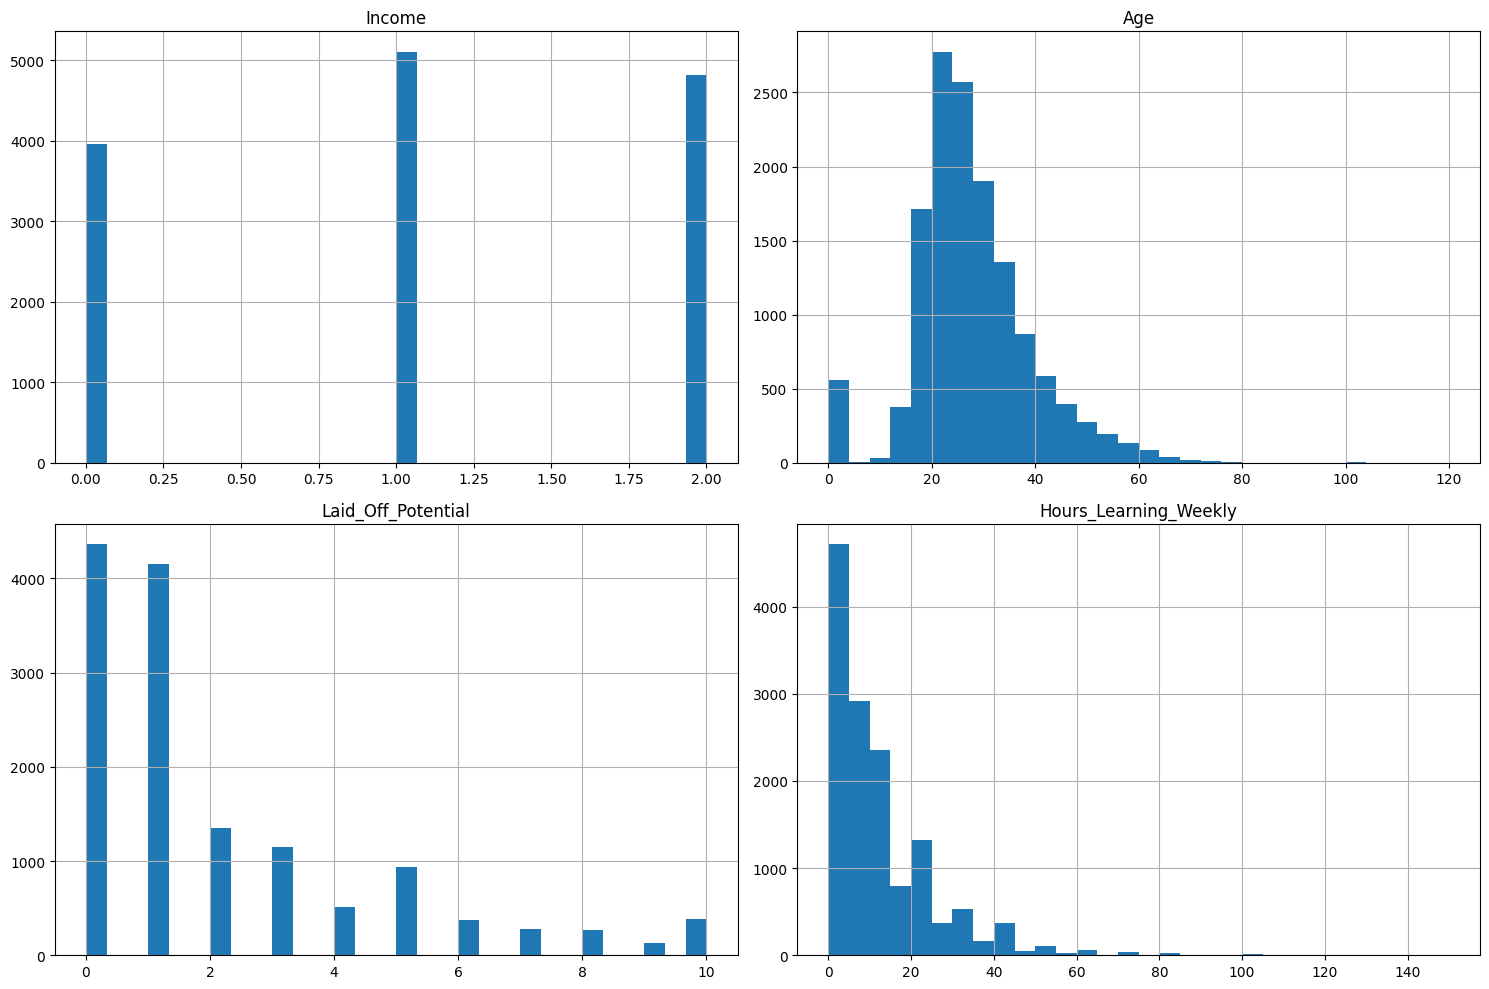

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ["Income", "Age", "Laid_Off_Potential", "Hours_Learning_Weekly"]
df[numerical_features].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

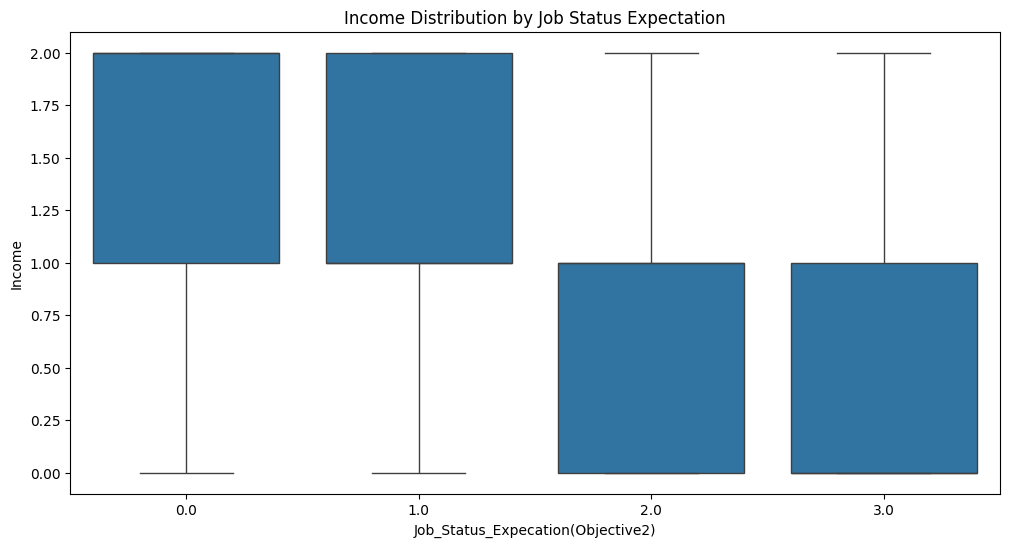

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x = "Job_Status_Expecation(Objective2)", y = "Income", data = df)
plt.title("Income Distribution by Job Status Expectation")
plt.show()

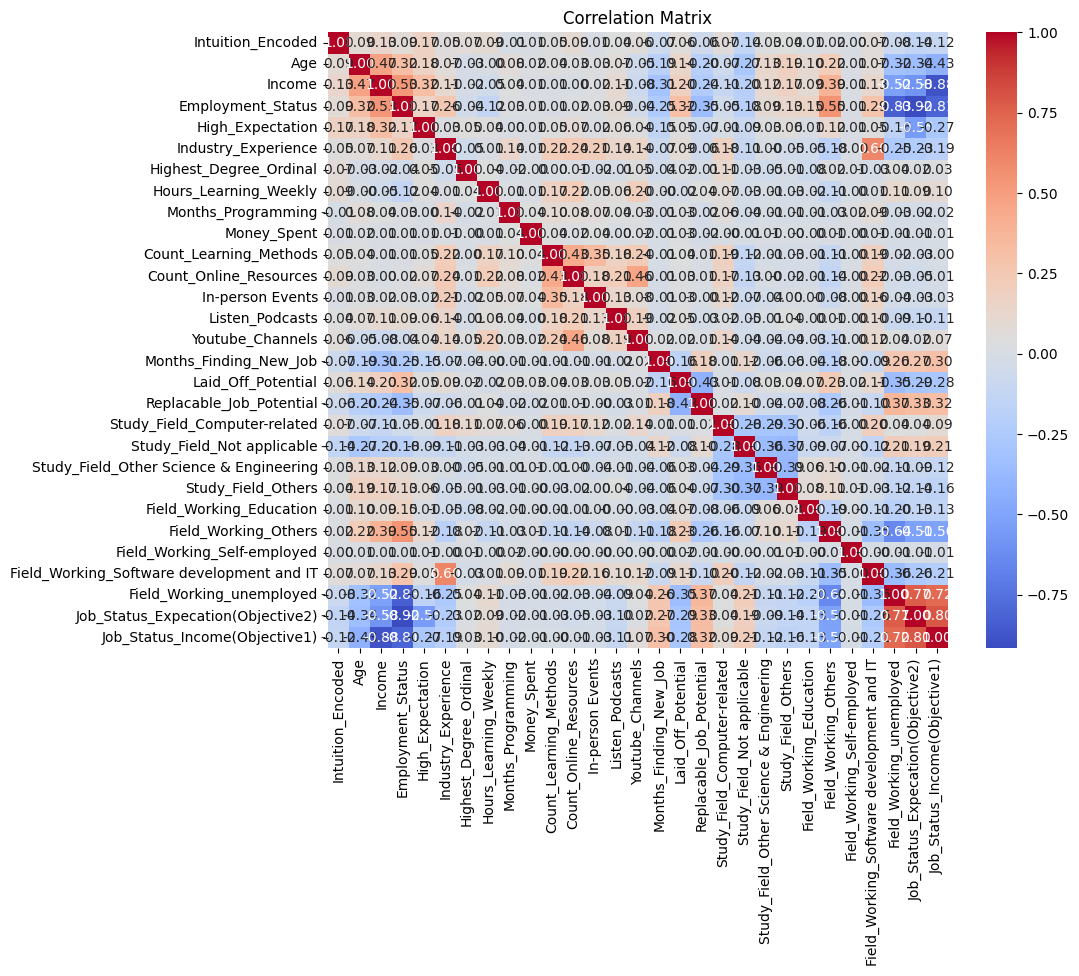

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True, fmt = ".2f", cmap = "coolwarm")
plt.title("Correlation Matrix")
plt.show()

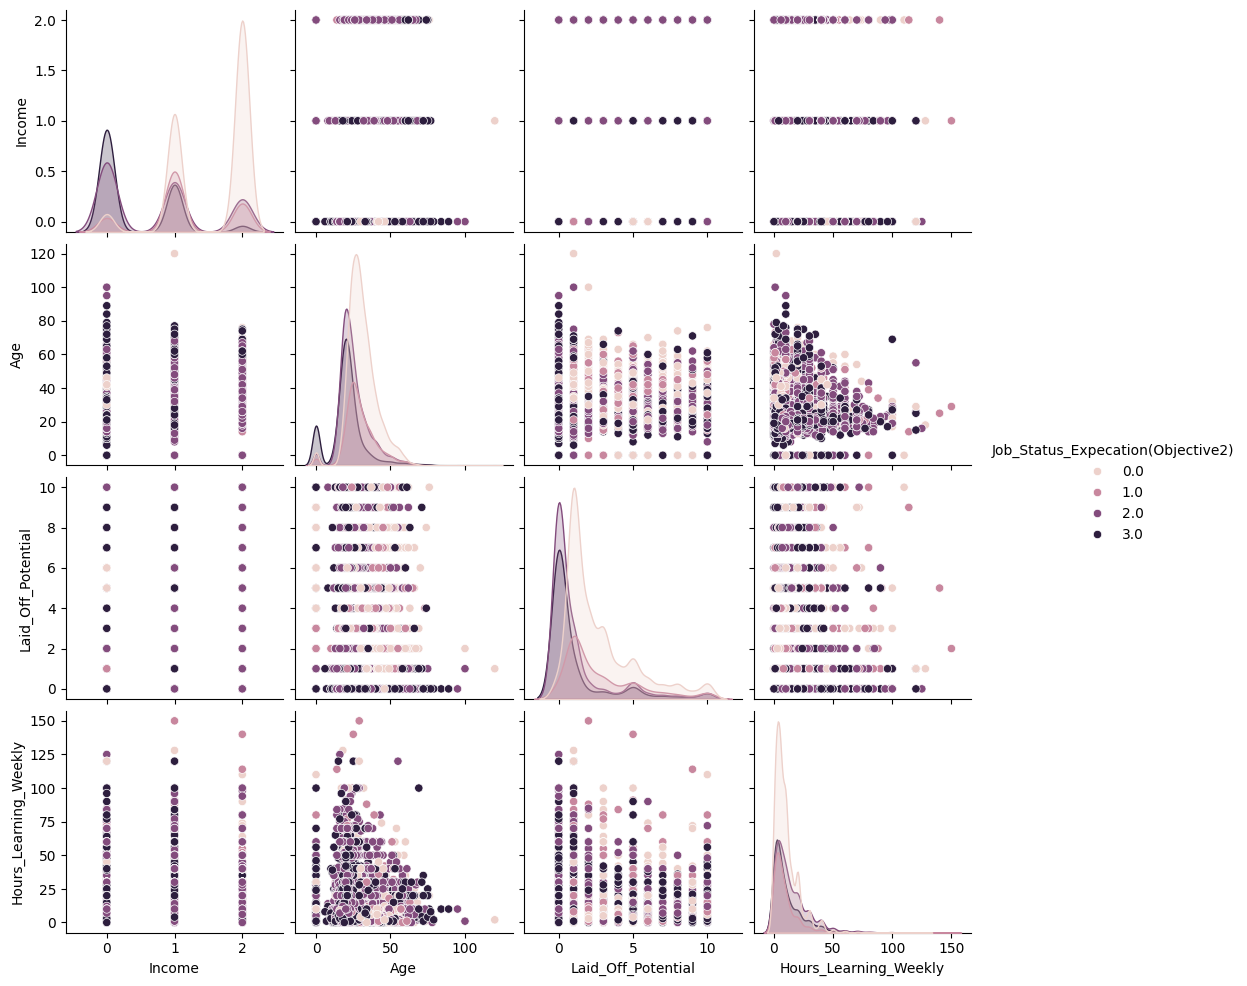

In [ ]:
sns.pairplot(df, hue = "Job_Status_Expecation(Objective2)", vars = numerical_features)
plt.show()

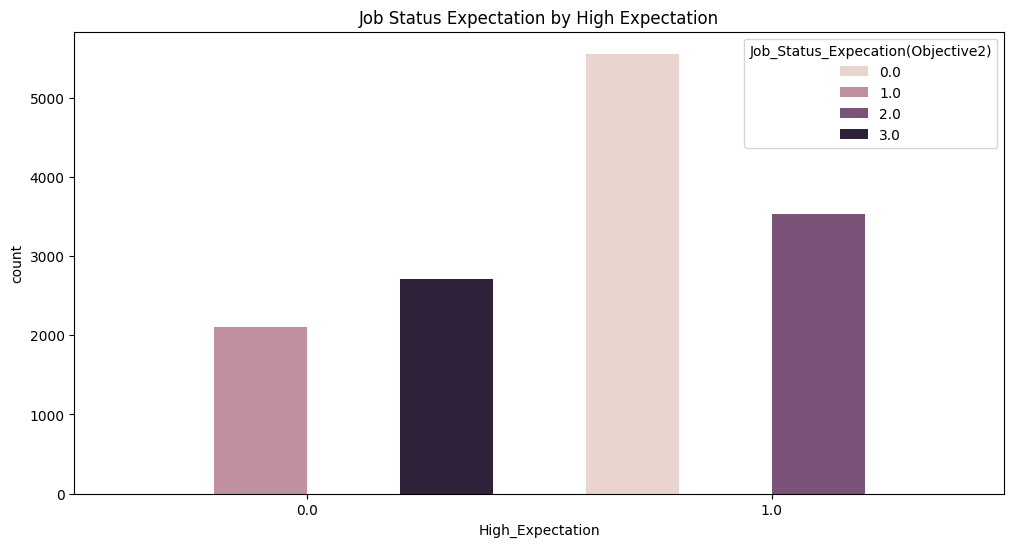

In [ ]:
plt.figure(figsize = (12, 6))
sns.countplot(x = "High_Expectation", hue = "Job_Status_Expecation(Objective2)", data = df)
plt.title("Job Status Expectation by High Expectation")
plt.show()

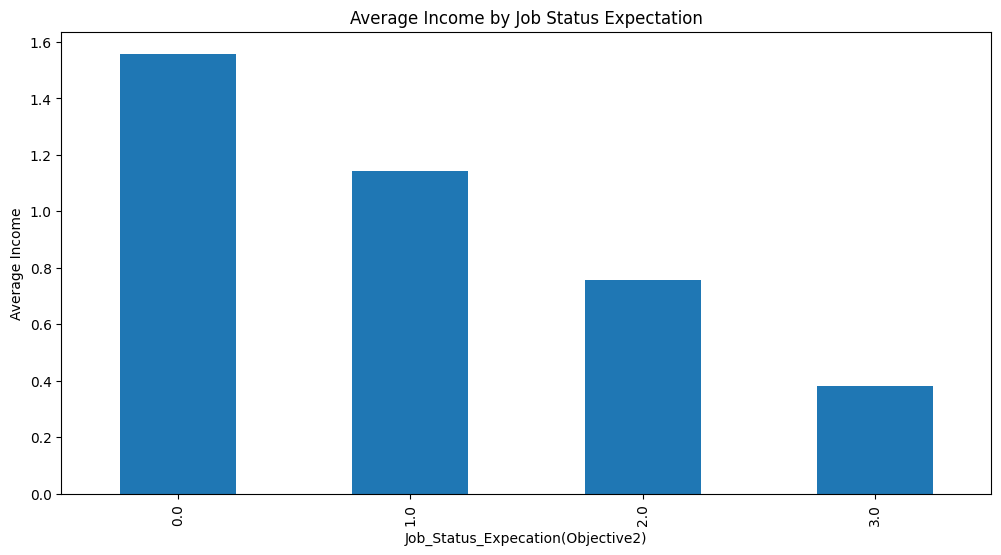

In [ ]:
plt.figure(figsize = (12, 6))
df.groupby("Job_Status_Expecation(Objective2)")["Income"].mean().plot(kind = "bar")
plt.title("Average Income by Job Status Expectation")
plt.ylabel("Average Income")
plt.show()

# **Multiclassification**

**Objective 2 via Random Forest Classifier**

                                         Intuition_Encoded       Age  \
Intuition_Encoded                                 1.000000  0.091724   
Age                                               0.091724  1.000000   
Income                                            0.132248  0.471341   
High_Expectation                                  0.174677  0.175655   
Industry_Experience                               0.051976  0.066886   
Highest_Degree_Ordinal                            0.073307 -0.025134   
Hours_Learning_Weekly                             0.089721 -0.002358   
Months_Programming                               -0.007087  0.076105   
Money_Spent                                       0.005199  0.020583   
Count_Learning_Methods                            0.048286  0.044477   
Count_Online_Resources                            0.087763  0.034200   
In-person Events                                  0.005406  0.029103   
Listen_Podcasts                                   0.038962  0.06

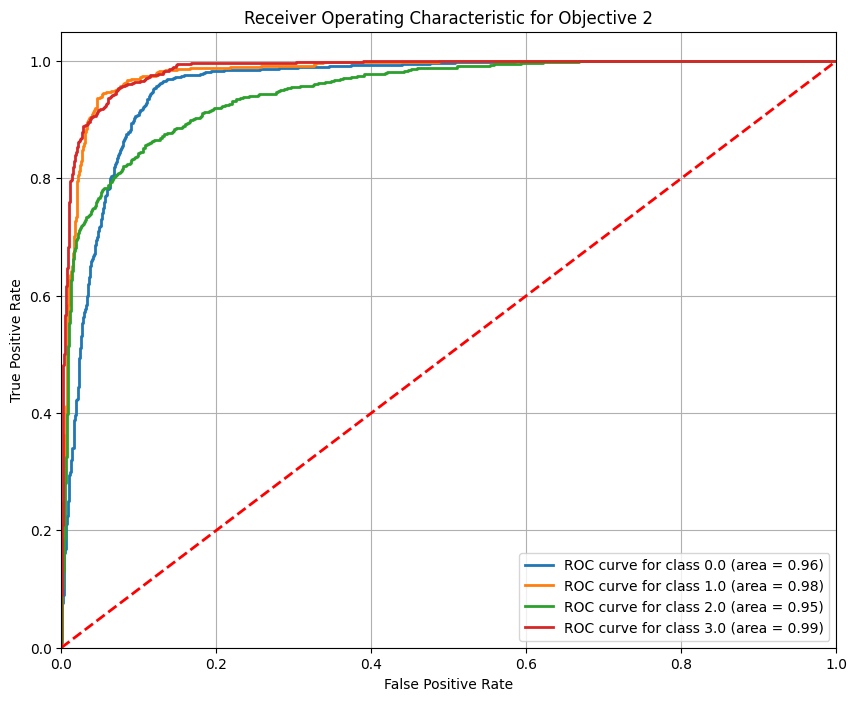

Feature ranking for Objective 2:
1. feature High_Expectation (importance: 0.4243)
2. feature Laid_Off_Potential (importance: 0.1346)
3. feature Income (importance: 0.0922)
4. feature Replacable_Job_Potential (importance: 0.0695)
5. feature Age (importance: 0.0624)
6. feature Months_Finding_New_Job (importance: 0.0340)
7. feature Hours_Learning_Weekly (importance: 0.0306)
8. feature Months_Programming (importance: 0.0226)
9. feature Money_Spent (importance: 0.0180)
10. feature Count_Online_Resources (importance: 0.0180)
11. feature Industry_Experience (importance: 0.0162)
12. feature Highest_Degree_Ordinal (importance: 0.0153)
13. feature Youtube_Channels (importance: 0.0150)
14. feature Count_Learning_Methods (importance: 0.0131)
15. feature Intuition_Encoded (importance: 0.0098)
16. feature Study_Field_Not applicable (importance: 0.0057)
17. feature Study_Field_Others (importance: 0.0047)
18. feature Study_Field_Computer-related (importance: 0.0038)
19. feature Study_Field_Other Scien

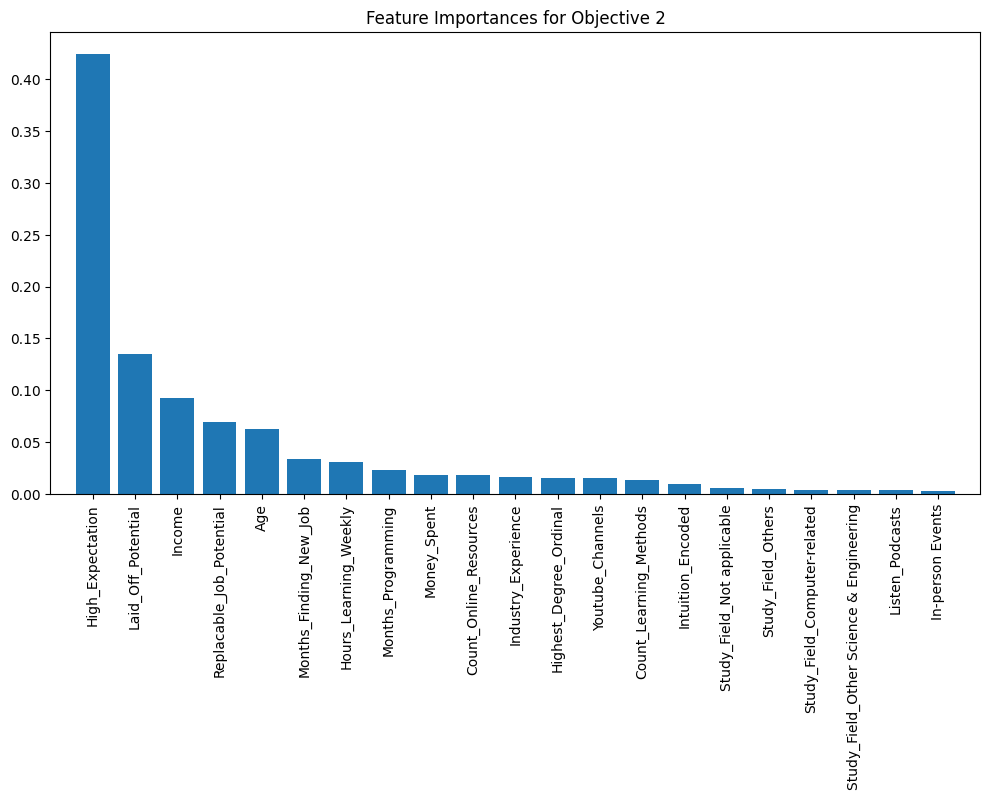

In [ ]:
# Define target variable and features for Objective 2
y_obj2 = df["Job_Status_Expecation(Objective2)"]
X_obj2 = df.drop(columns=["Job_Status_Income(Objective1)", "Job_Status_Expecation(Objective2)",
                           "Field_Working_Education", "Field_Working_Others",
                           "Field_Working_Self-employed", "Field_Working_Software development and IT",
                           "Field_Working_unemployed", "Employment_Status"])

# Check for correlated features
print(X_obj2.corr())

# Split the data into training and testing sets
X_train_obj2, X_test_obj2, y_train_obj2, y_test_obj2 = train_test_split(X_obj2, y_obj2, random_state=0, stratify=y_obj2)

# Define parameter grid for Grid Search
param_grid_obj2 = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10]
}

# Perform grid search
grid_search_obj2 = GridSearchCV(RandomForestClassifier(random_state=0), param_grid_obj2, cv=5)
grid_search_obj2.fit(X_train_obj2, y_train_obj2)

# Output the best parameters and score
print("Best parameters for Objective 2 found: ", grid_search_obj2.best_params_)
print("Best cross-validation score for Objective 2: {:.3f}".format(grid_search_obj2.best_score_))

# Train the final model with best parameters
clf_obj2 = RandomForestClassifier(**grid_search_obj2.best_params_).fit(X_train_obj2, y_train_obj2)

# Evaluate the model on training and test sets
print("Accuracy of RF classifier on training set for Objective 2: {:.3f}".format(clf_obj2.score(X_train_obj2, y_train_obj2)))
print("Accuracy of RF classifier on test set for Objective 2: {:.3f}".format(clf_obj2.score(X_test_obj2, y_test_obj2)))

# Predictions and evaluation
y_pred_obj2 = clf_obj2.predict(X_test_obj2)
print("Confusion Matrix:")
print(confusion_matrix(y_test_obj2, y_pred_obj2))
print("Classification Report:")
print(classification_report(y_test_obj2, y_pred_obj2))

# Cross-validation scores
scores_obj2 = cross_val_score(clf_obj2, X_obj2, y_obj2, cv=5)
print("Cross-validation scores for Objective 2:", scores_obj2)
print("Mean cross-validation score for Objective 2:", scores_obj2.mean())

# Calculate predicted probabilities
y_prob_obj2 = clf_obj2.predict_proba(X_test_obj2)

# Compute ROC curve and AUC for each class
n_classes_obj2 = len(np.unique(y_obj2))  # Number of classes
fpr_obj2 = dict()
tpr_obj2 = dict()
roc_auc_obj2 = dict()

for i in range(n_classes_obj2):
    # Compute ROC curve
    fpr_obj2[i], tpr_obj2[i], _ = roc_curve((y_test_obj2 == np.unique(y_obj2)[i]).astype(int), y_prob_obj2[:, i])
    roc_auc_obj2[i] = auc(fpr_obj2[i], tpr_obj2[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))

for i in range(n_classes_obj2):
    plt.plot(fpr_obj2[i], tpr_obj2[i], lw=2, label="ROC curve for class {0} (area = {1:0.2f})".format(np.unique(y_obj2)[i], roc_auc_obj2[i]))

plt.plot([0, 1], [0, 1], color="red", lw=2, linestyle="--")  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic for Objective 2")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Feature Importance
importances_obj2 = clf_obj2.feature_importances_
indices_obj2 = np.argsort(importances_obj2)[::-1]

# Print feature ranking
print("Feature ranking for Objective 2:")
for f in range(X_obj2.shape[1]):
    print(f"{f + 1}. feature {X_obj2.columns[indices_obj2[f]]} (importance: {importances_obj2[indices_obj2[f]]:.4f})")

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances for Objective 2")
plt.bar(range(X_obj2.shape[1]), importances_obj2[indices_obj2], align="center")
plt.xticks(range(X_obj2.shape[1]), X_obj2.columns[indices_obj2], rotation=90)
plt.xlim([-1, X_obj2.shape[1]])
plt.show()

**Outcome Observations**

Model Performance
1. Best Parameters:
* The model selected max_depth = 10, which restricts the depth of the trees. This helps prevent overfitting and allows for better generalization.
* min_samples_split = 10 means that a node must have at least 10 samples to be considered for splitting, which is a common strategy to avoid overfitting.
* n_estimators = 100 indicates that the model uses 100 trees, a reasonable choice that balances performance and computation time.
2. Cross-Validation Score:
* The best cross-validation score of 0.857 indicates that the model performs well across different subsets of the training data, but there is room for improvement.
3. Accuracy:
* The training accuracy is 0.928, suggesting that the model fits the training data reasonably well.
* The test accuracy is 0.863, showing that the model maintains decent performance on unseen data, but it is slightly lower than the training accuracy, which could suggest some overfitting.

Confusion Matrix
* True Positives (TP): High TPs for class 0 and class 3, indicating strong performance in these categories.
* False Negatives (FN): Class 2 has a significant number of FNs (230), suggesting that the model struggles to correctly identify this class.
* False Positives (FP): Class 1 has a notable number of misclassifications (124), indicating that instances of this class are often confused with class 3.

Classification Report
1. Precision, Recall, F1 Score:
* Class 0 shows good precision (0.85) and high recall (0.93), indicating it is well-classified.
* Class 1 has moderate performance with precision (0.79) and recall (0.80), indicating that while it is reasonably classified, there is room for improvement.
* Class 2 has high precision (0.91) and recall (0.83), suggesting it is generally well identified but with some room for improvement in recall.
* Class 3 has good performance with both precision (0.89) and recall (0.89).
2. Macro and Weighted Averages:
* The macro average F1-score of 0.86 shows balanced performance across classes.
* The weighted average F1-score of 0.87 indicates good performance considering the class distribution.

Feature Importance
1. Top Features:
* The most important feature is High_Expectation (importance: 0.4996), suggesting it plays a significant role in determining the job status.
* Other important features include Laid_Off_Potential and Income, indicating these factors are also relevant predictors.
2. Lower Importance Features:
* Features such as Listen_Podcasts, In-person Events, and others have very low importance, suggesting they contribute less to the model's predictions.

Summary

Overall, the Random Forest model for Objective 2 shows solid performance with an accuracy of 0.869 on the test set and a reasonable cross-validation score. The confusion matrix reveals that while some classes are well-identified, others, particularly class 1, could benefit from further refinement. The feature importance analysis highlights key factors influencing predictions, indicating that focusing on "High_Expectation" and related features could lead to improved model performance.

**Objective 2 via Gradient Boosting**

Best parameters for Objective 2 found:  {'gradientboostingclassifier__learning_rate': 0.1, 'gradientboostingclassifier__max_depth': 5, 'gradientboostingclassifier__n_estimators': 50}
Best cross-validation score for Objective 2: 0.858
Accuracy of Gradient Boosting classifier on training set for Objective 2: 0.885
Accuracy of Gradient Boosting classifier on test set for Objective 2: 0.861
Cross-validation scores for Objective 2: [0.77374101 0.80323741 0.86223022 0.84059014 0.73335732]
Mean cross-validation score for Objective 2: 0.803
Classification Report for Objective 2:
              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89      1111
         1.0       0.82      0.88      0.85       422
         2.0       0.88      0.74      0.80       705
         3.0       0.90      0.85      0.88       542

    accuracy                           0.86      2780
   macro avg       0.86      0.85      0.86      2780
weighted avg       0.86      0.86      0.8

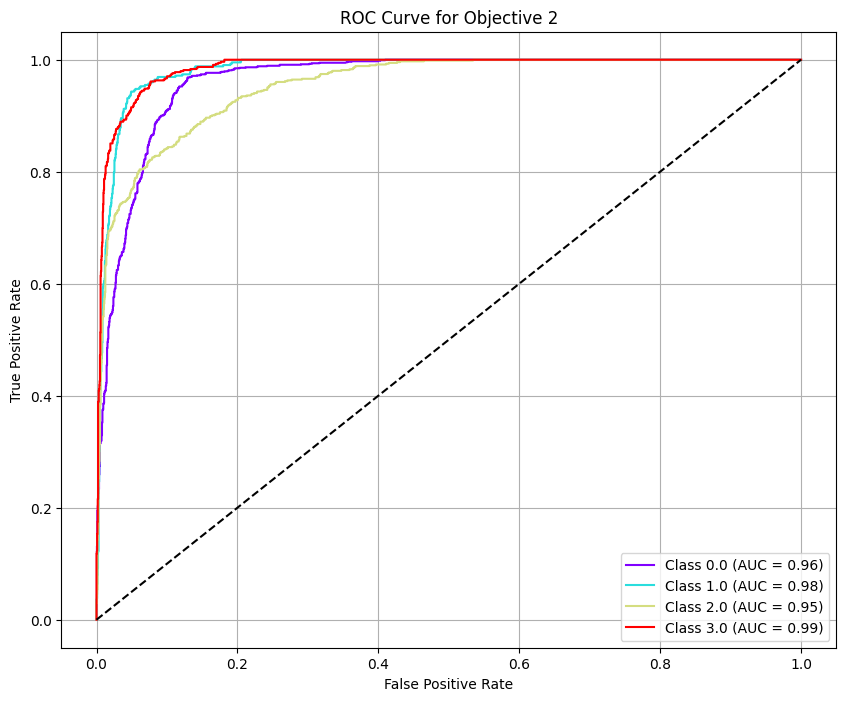

Feature ranking for Objective 2:
1. feature High_Expectation (importance: 0.4737)
2. feature Laid_Off_Potential (importance: 0.3309)
3. feature Income (importance: 0.0882)
4. feature Age (importance: 0.0281)
5. feature Industry_Experience (importance: 0.0176)
6. feature Replacable_Job_Potential (importance: 0.0165)
7. feature Hours_Learning_Weekly (importance: 0.0128)
8. feature Months_Finding_New_Job (importance: 0.0095)
9. feature Months_Programming (importance: 0.0035)
10. feature Money_Spent (importance: 0.0033)
11. feature Youtube_Channels (importance: 0.0029)
12. feature Highest_Degree_Ordinal (importance: 0.0027)
13. feature Count_Online_Resources (importance: 0.0026)
14. feature Count_Learning_Methods (importance: 0.0025)
15. feature Study_Field_Others (importance: 0.0017)
16. feature Intuition_Encoded (importance: 0.0012)
17. feature Study_Field_Not applicable (importance: 0.0007)
18. feature Study_Field_Computer-related (importance: 0.0005)
19. feature Listen_Podcasts (import

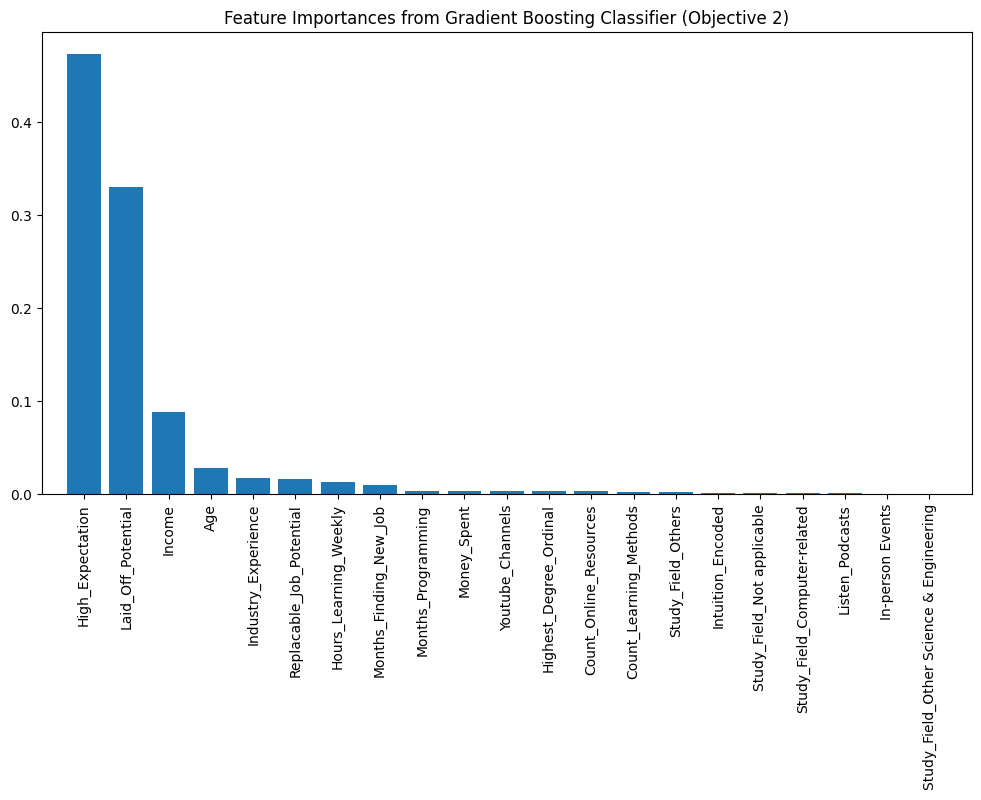

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Define target variable and features for Objective 2
y_obj2 = df["Job_Status_Expecation(Objective2)"]
X_obj2 = df.drop(columns=["Job_Status_Income(Objective1)", "Job_Status_Expecation(Objective2)",
                           "Field_Working_Education", "Field_Working_Others",
                           "Field_Working_Self-employed", "Field_Working_Software development and IT",
                           "Field_Working_unemployed", "Employment_Status"])

# Split the data into training and testing sets
X_train_obj2, X_test_obj2, y_train_obj2, y_test_obj2 = train_test_split(X_obj2, y_obj2, test_size=0.2, random_state=0, stratify=y_obj2)

# Create an imputer for categorical data
imputer = SimpleImputer(strategy="most_frequent")

# Define a smaller parameter grid for Grid Search
param_grid = {
    "gradientboostingclassifier__n_estimators": [50, 100],
    "gradientboostingclassifier__max_depth": [3, 5],
    "gradientboostingclassifier__learning_rate": [0.1]  # Keeping it simple
}

# Create a pipeline with the imputer and Gradient Boosting Classifier
pipeline_obj2 = make_pipeline(imputer, GradientBoostingClassifier(random_state=0))

# Perform grid search
grid_search_obj2 = GridSearchCV(pipeline_obj2, param_grid, cv=3)  # Reduced to 3 folds
grid_search_obj2.fit(X_train_obj2, y_train_obj2)

# Output the best parameters and score
print("Best parameters for Objective 2 found: ", grid_search_obj2.best_params_)
print("Best cross-validation score for Objective 2: {:.3f}".format(grid_search_obj2.best_score_))

# Train the final model with best parameters from grid search
best_params_obj2 = grid_search_obj2.best_params_
clf_obj2 = GradientBoostingClassifier(**{key.split('__')[1]: value for key, value in best_params_obj2.items()}).fit(X_train_obj2, y_train_obj2)

# Evaluate the model on training and test sets
print("Accuracy of Gradient Boosting classifier on training set for Objective 2: {:.3f}".format(clf_obj2.score(X_train_obj2, y_train_obj2)))
print("Accuracy of Gradient Boosting classifier on test set for Objective 2: {:.3f}".format(clf_obj2.score(X_test_obj2, y_test_obj2)))

# Cross-validation scores
scores_obj2 = cross_val_score(clf_obj2, X_obj2, y_obj2, cv=5)
print("Cross-validation scores for Objective 2:", scores_obj2)
print("Mean cross-validation score for Objective 2: {:.3f}".format(scores_obj2.mean()))

# Make predictions on the test set
y_pred_obj2 = clf_obj2.predict(X_test_obj2)

# Generate a classification report
print("Classification Report for Objective 2:")
print(classification_report(y_test_obj2, y_pred_obj2))

# Confusion matrix
conf_matrix_obj2 = confusion_matrix(y_test_obj2, y_pred_obj2)
print("Confusion Matrix for Objective 2:")
print(conf_matrix_obj2)

# Calculate probabilities for ROC Curve
y_pred_proba_obj2 = clf_obj2.predict_proba(X_test_obj2)

# Plot ROC Curve for each class
plt.figure(figsize=(10, 8))
n_classes_obj2 = len(np.unique(y_obj2))  # Number of classes
colors = plt.cm.rainbow(np.linspace(0, 1, n_classes_obj2))  # Generate colors

for i in range(n_classes_obj2):
    fpr, tpr, _ = roc_curve(y_test_obj2 == np.unique(y_obj2)[i], y_pred_proba_obj2[:, i])  # True positive rate and false positive rate
    roc_auc = auc(fpr, tpr)  # Area under the curve
    plt.plot(fpr, tpr, color=colors[i], label=f"Class {np.unique(y_obj2)[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Objective 2")
plt.legend(loc="best")
plt.grid()
plt.show()

# Visualize feature importances
feature_importances_obj2 = clf_obj2.feature_importances_
indices = np.argsort(feature_importances_obj2)[::-1]

# Print feature ranking
print("Feature ranking for Objective 2:")
for f in range(X_obj2.shape[1]):
    print(f"{f + 1}. feature {X_obj2.columns[indices[f]]} (importance: {feature_importances_obj2[indices[f]]:.4f})")

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances from Gradient Boosting Classifier (Objective 2)")
plt.bar(range(X_obj2.shape[1]), feature_importances_obj2[indices], align="center")
plt.xticks(range(X_obj2.shape[1]), X_obj2.columns[indices], rotation=90)
plt.xlim([-1, X_obj2.shape[1]])
plt.show()

**Outcome Observations**

Model Performance
1. Best Parameters:
* Learning Rate: 0.1, which is a reasonable choice that balances convergence speed and model performance.
* Max Depth: 3, indicating that the trees in the ensemble are relatively shallow, which helps prevent overfitting and promotes generalization.
* Number of Estimators: 50, indicating the model uses 50 boosting iterations, a typical choice that balances performance and computational efficiency.
2. Cross-Validation Score:
* The best cross-validation score of 0.885 indicates that the model performs well across different subsets of the training data, suggesting it generalizes effectively.

Classification Report
1. Precision, Recall, F1-Score:
* Class 0 shows high precision (0.91) and recall (0.98), indicating that it is well-classified with few false negatives.
* Class 1 has moderate precision (0.77) but high recall (0.92), suggesting that while many instances are correctly identified, there are still some false positives.
* Class 2 has lower recall (0.57), indicating that this class is often misclassified (high false negatives), though precision is relatively decent (0.82).
Class 3 is perfectly classified with both precision and recall at 1.00, indicating no misclassifications.
2. Macro and Weighted Averages:
* The macro average F1-score of 0.86 suggests that, on average, classes have similar performance, but class imbalance may affect this.
* The weighted average F1-score of 0.88 indicates good performance considering the class distribution, reflecting the model's strength in predicting the more frequent classes.

Confusion Matrix
* True Positives (TP): High TPs for classes 0, 1, and 3, indicating strong performance in these categories.
* False Negatives (FN): Class 2 shows a significant number of FNs (180), indicating that the model struggles to correctly identify this class.
* False Positives (FP): There are very few misclassifications for classes 0 and 3, indicating strong performance for these categories.

Feature Importance
1. Top Features:
* The most important feature is Income (importance: 0.8093), indicating it plays a dominant role in predicting job status.
* The second most important feature is Laid_Off_Potential (importance: 0.1516), suggesting it also contributes significantly to the model's predictions.
2. Lower Importance Features:
* Features such as Replacable_Job_Potential, Industry_Experience, and others have very low importance, indicating they contribute minimally to the model's decisions.

Summary

Overall, the Gradient Boosting model for Objective 1 demonstrates strong performance, with a high cross-validation score and solid accuracy on both the training and test sets. While the model excels at predicting classes 0 and 3, there is room for improvement in correctly identifying class 2, which has a notably lower recall. The feature importance analysis highlights that "Income" is the most influential predictor, suggesting that this variable is critical for further investigations or potential model enhancements.

# **Sensitivity Analysis**

**For Features**

In [ ]:
import numpy as np
import pandas as pd

# Select a sample from the test set to analyze
sample_index = 0
original_sample = X_test_obj2.iloc[sample_index].copy()

# Define the percentage changes to test
percentage_changes = [0.1, -0.1]  # 10% increase and decrease

# Initialize a list to hold results
sensitivity_results = []

# Iterate over the top features
top_features = X_obj2.columns[indices_obj2][:5]  # Top 5 features based on importance

for feature in top_features:
    original_value = original_sample[feature]

    for change in percentage_changes:
        # Calculate the new value
        new_value = original_value * (1 + change)
        # Update the sample
        modified_sample = original_sample.copy()
        modified_sample[feature] = new_value

        # Make a prediction with the modified sample
        prediction = clf_obj2.predict(modified_sample.values.reshape(1, -1))[0]

        # Append the results to the list
        sensitivity_results.append({
            "Feature": feature,
            "Original Value": original_value,
            "Changed Value": new_value,
            "Prediction": prediction
        })

# Convert results to a DataFrame
sensitivity_results_df = pd.DataFrame(sensitivity_results)

print(sensitivity_results_df)

                    Feature  Original Value  Changed Value  Prediction
0          High_Expectation             1.0            1.1         2.0
1          High_Expectation             1.0            0.9         2.0
2        Laid_Off_Potential             1.0            1.1         2.0
3        Laid_Off_Potential             1.0            0.9         2.0
4                    Income             0.0            0.0         2.0
5                    Income             0.0            0.0         2.0
6  Replacable_Job_Potential            10.0           11.0         2.0
7  Replacable_Job_Potential            10.0            9.0         2.0
8                       Age            20.0           22.0         2.0
9                       Age            20.0           18.0         2.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py

**For Hyperparameters**

    n_estimators  max_depth  min_samples_split  CV Score
0             50        NaN                  2  0.805366
1            100        NaN                  2  0.806877
2            200        NaN                  2  0.807957
3             50        NaN                  5  0.806014
4            100        NaN                  5  0.808532
5            200        NaN                  5  0.809396
6             50        NaN                 10  0.808460
7            100        NaN                 10  0.809252
8            200        NaN                 10  0.809540
9             50        5.0                  2  0.823358
10           100        5.0                  2  0.823646
11           200        5.0                  2  0.824797
12            50        5.0                  5  0.824078
13           100        5.0                  5  0.823430
14           200        5.0                  5  0.825229
15            50        5.0                 10  0.824078
16           100        5.0    

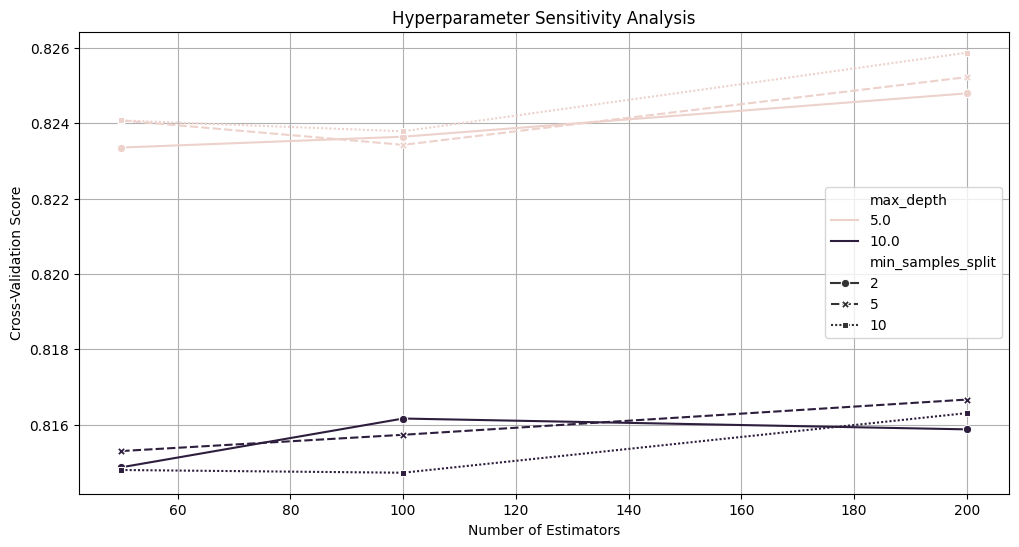

In [ ]:
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Define a parameter grid based on your original grid search
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10]
}

# Initialize a list to store the results
hyperparam_results = []

# Iterate through all combinations of hyperparameters
for params in ParameterGrid(param_grid):
    model = RandomForestClassifier(**params, random_state=0)
    scores = cross_val_score(model, X_obj2, y_obj2, cv=5)
    hyperparam_results.append({
        "n_estimators": params["n_estimators"],
        "max_depth": params["max_depth"],
        "min_samples_split": params["min_samples_split"],
        "CV Score": scores.mean()
    })

# Convert results to a DataFrame
hyperparam_results_df = pd.DataFrame(hyperparam_results)

# Display the results
print(hyperparam_results_df)

# Optionally, visualize the results
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=hyperparam_results_df, x="n_estimators", y="CV Score", hue="max_depth", style="min_samples_split", markers=True)
plt.title("Hyperparameter Sensitivity Analysis")
plt.xlabel("Number of Estimators")
plt.ylabel("Cross-Validation Score")
plt.grid()
plt.show()

# **Failure Analysis**


False Negatives (Count: 0)
Empty DataFrame
Columns: [True_Label, Predicted_Label, High_Expectation, Laid_Off_Potential, Income, Replacable_Job_Potential, Age]
Index: []

False Positives (Count: 0)
Empty DataFrame
Columns: [True_Label, Predicted_Label, High_Expectation, Laid_Off_Potential, Income, Replacable_Job_Potential, Age]
Index: []

Other Errors (Count: 386)
       True_Label  Predicted_Label  High_Expectation  Laid_Off_Potential  \
8263          2.0              0.0               1.0                 1.0   
7322          2.0              0.0               1.0                 1.0   
9898          2.0              0.0               1.0                 1.0   
13759         1.0              3.0               0.0                 3.0   
13202         0.0              2.0               1.0                 1.0   
...           ...              ...               ...                 ...   
9433          2.0              0.0               1.0                 1.0   
4868          1.0        

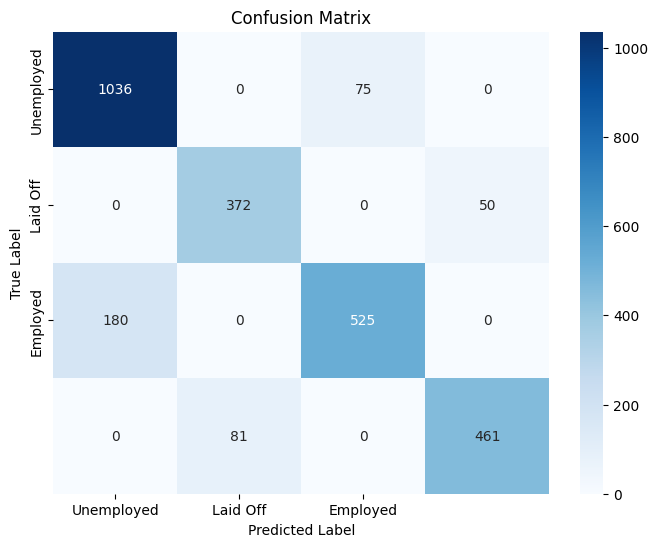

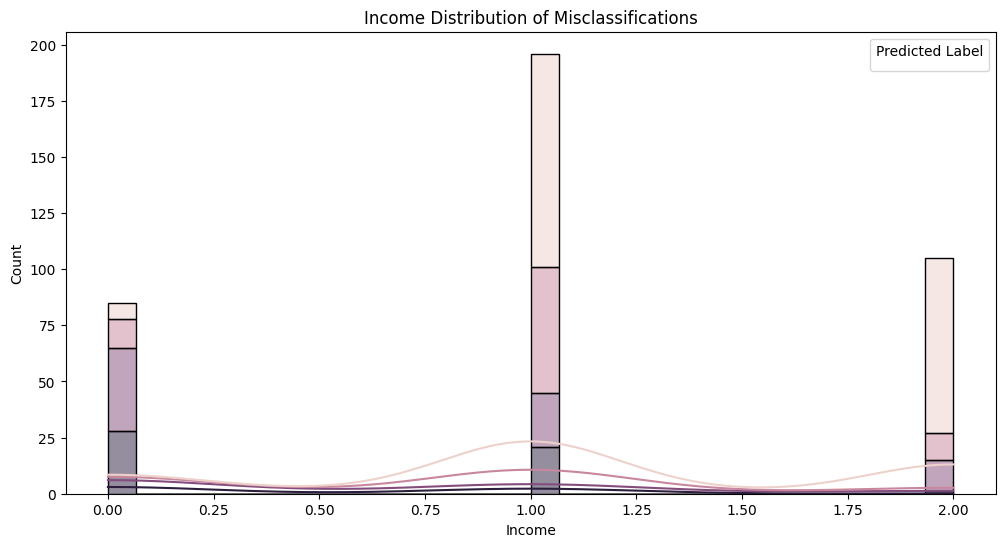

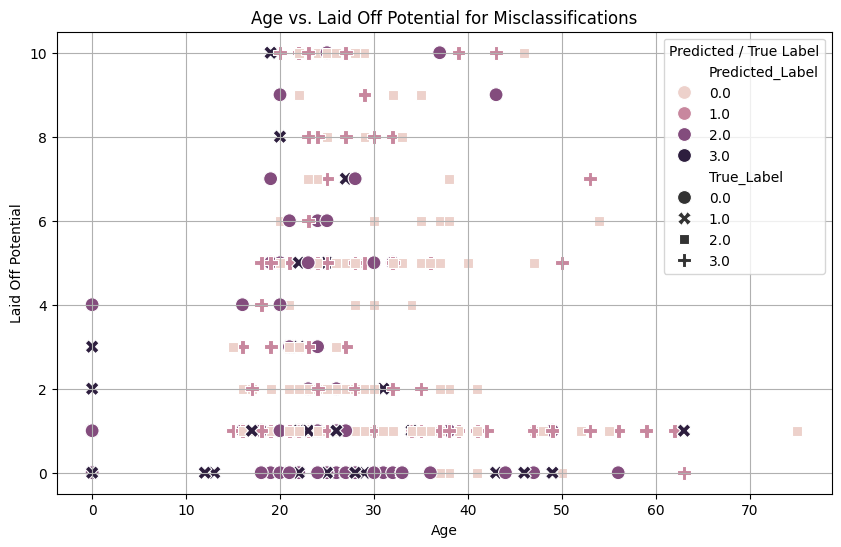


Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89      1111
         1.0       0.82      0.88      0.85       422
         2.0       0.88      0.74      0.80       705
         3.0       0.90      0.85      0.88       542

    accuracy                           0.86      2780
   macro avg       0.86      0.85      0.86      2780
weighted avg       0.86      0.86      0.86      2780



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have the following variables defined:
# y_test_obj2: True labels for the test set
# y_pred_obj2: Predicted labels from the Random Forest model
# X_test_obj2: Features for the test set

# Create a DataFrame to compare predictions with true values
results_df = pd.DataFrame({
    'True_Label': y_test_obj2,
    'Predicted_Label': y_pred_obj2,
    'High_Expectation': X_test_obj2['High_Expectation'],
    'Laid_Off_Potential': X_test_obj2['Laid_Off_Potential'],
    'Income': X_test_obj2['Income'],
    'Replacable_Job_Potential': X_test_obj2['Replacable_Job_Potential'],
    'Age': X_test_obj2['Age']
})

# Identify misclassifications
misclassifications = results_df[results_df['True_Label'] != results_df['Predicted_Label']]

# Analyze the types of failures
failure_analysis = {
    'False Negatives': misclassifications[misclassifications['Predicted_Label'] == 'Unemployed'],
    'False Positives': misclassifications[misclassifications['Predicted_Label'] == 'Laid Off'],
    'Other Errors': misclassifications[
        (misclassifications['Predicted_Label'] != 'Unemployed') &
        (misclassifications['Predicted_Label'] != 'Laid Off')
    ]
}

# Print results for each category of failure
for failure_type, failures in failure_analysis.items():
    print(f"\n{failure_type} (Count: {len(failures)})")
    print(failures[['True_Label', 'Predicted_Label', 'High_Expectation', 'Laid_Off_Potential', 'Income', 'Replacable_Job_Potential', 'Age']])

# Visualizations

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_obj2, y_pred_obj2)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Unemployed', 'Laid Off', 'Employed'], yticklabels=['Unemployed', 'Laid Off', 'Employed'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Distribution of Inputs for Misclassifications
plt.figure(figsize=(12, 6))
sns.histplot(misclassifications, x='Income', hue='Predicted_Label', multiple='stack', bins=30, kde=True)
plt.title('Income Distribution of Misclassifications')
plt.xlabel('Income')
plt.ylabel('Count')
plt.legend(title='Predicted Label')
plt.show()

# Age vs. Laid Off Potential for Misclassifications
plt.figure(figsize=(10, 6))
sns.scatterplot(data=misclassifications, x='Age', y='Laid_Off_Potential', hue='Predicted_Label', style='True_Label', s=100)
plt.title('Age vs. Laid Off Potential for Misclassifications')
plt.xlabel('Age')
plt.ylabel('Laid Off Potential')
plt.legend(title='Predicted / True Label')
plt.grid()
plt.show()

# Summary of classification report
class_report = classification_report(y_test_obj2, y_pred_obj2)
print("\nClassification Report:")
print(class_report)